In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
import random
import shutil

In [2]:
os.listdir()

['1_normal',
 '2_cataract',
 'assets',
 'eye.ipynb',
 'fingerprint.pb',
 'keras_metadata.pb',
 'saved_model.pb',
 'training',
 'validation',
 'variables']

In [3]:
#for number of pictures
cat=len(os.listdir('2_cataract'))
normal= len(os.listdir("1_normal"))
print(f"total number of images in cataract folder {cat}")
print(f"total number of images in normal folder {normal}" )

total number of images in cataract folder 100
total number of images in normal folder 300


In [4]:
#currnet working directory
(root_dir:=os.getcwd())

'f:\\eye\\dataset'

In [5]:
def create_train_val_dirs(root_path):
    """
    Creates directories for the train and test sets
    
    Args:
      root_path (string) - the base directory path to create subdirectories from
    
    Returns:
      None
    """
    path = os.path.join(root_path, "training")
    os.makedirs(path)
    path_1 = os.path.join(path, "2_cataract")
    os.makedirs(path_1)
    path_2 = os.path.join(path, "1_normal")
    os.makedirs(path_2)
    path = os.path.join(root_path, "validation")
    os.makedirs(path)
    path_3 = os.path.join(path, "2_cataract")
    os.makedirs(path_3)
    path_4 = os.path.join(path, "1_normal")
    os.makedirs(path_4)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("The upper directory already exists.")

The upper directory already exists.


In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

f:\eye\dataset\1_normal
f:\eye\dataset\2_cataract
f:\eye\dataset\assets
f:\eye\dataset\training
f:\eye\dataset\validation
f:\eye\dataset\variables
f:\eye\dataset\training\1_normal
f:\eye\dataset\training\2_cataract
f:\eye\dataset\validation\1_normal
f:\eye\dataset\validation\2_cataract


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_train_val_dirs(root_path):
    """
    Creates directories for the train and test sets
    
    Args:
      root_path (string) - the base directory path to create subdirectories from
    
    Returns:
      None
    """
    path = os.path.join(root_path, "training")
    os.makedirs(path)
    path_1 = os.path.join(path, "2_cataract")
    os.makedirs(path_1)
    path_2 = os.path.join(path, "1_normal")
    os.makedirs(path_2)
    path = os.path.join(root_path, "validation")
    os.makedirs(path)
    path_3 = os.path.join(path, "2_cataract")
    os.makedirs(path_3)
    path_4 = os.path.join(path, "1_normal")
    os.makedirs(path_4)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("The upper directory already exists.")

# Define paths
CAT_SOURCE_DIR = "F:\\eye\\dataset\\2_cataract"
NORMAL_SOURCE_DIR = "F:\\eye\\dataset\\1_normal"

TRAINING_DIR = "f:\\eye\\dataset\\training"
VALIDATION_DIR = "f:\\eye\\dataset\\validation"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "2_cataract/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "2_cataract/")

TRAINING_NORMAL_DIR = os.path.join(TRAINING_DIR, "1_normal/")
VALIDATION_NORMAL_DIR = os.path.join(VALIDATION_DIR, "1_normal/")

# Remove files from training and validation directories
def empty_directory(directory):
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        try:
            if os.path.isfile(file_path):
                os.remove(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")

# Empty directories
empty_directory(TRAINING_CATS_DIR)
empty_directory(TRAINING_NORMAL_DIR)
empty_directory(VALIDATION_CATS_DIR)
empty_directory(VALIDATION_NORMAL_DIR)

# Define proportion of images used for training
split_size = 0.9

# Split data into training and validation sets
def split_data(source, training, validation, split_size):
    files = os.listdir(source)
    train_files, val_files = train_test_split(files, train_size=split_size, random_state=42)
    
    for file in train_files:
        src_file = os.path.join(source, file)
        dst_file = os.path.join(training, file)
        shutil.copy(src_file, dst_file)
    
    for file in val_files:
        src_file = os.path.join(source, file)
        dst_file = os.path.join(validation, file)
        shutil.copy(src_file, dst_file)

# Split data
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, VALIDATION_NORMAL_DIR, split_size)

# Your function should perform copies rather than moving images, so original directories should contain unchanged images
print(f"Original cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original normal's directory has {len(os.listdir(NORMAL_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_NORMAL_DIR))} images of normal for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_NORMAL_DIR))} images of normal for validation")


The upper directory already exists.
Original cat's directory has 100 images
Original normal's directory has 300 images

There are 85 images of cats for training
There are 255 images of normal for training
There are 15 images of cats for validation
There are 45 images of normal for validation


Sample normal image:


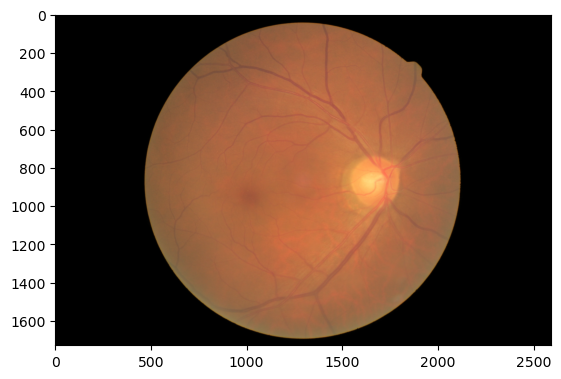


Sample cataract image:


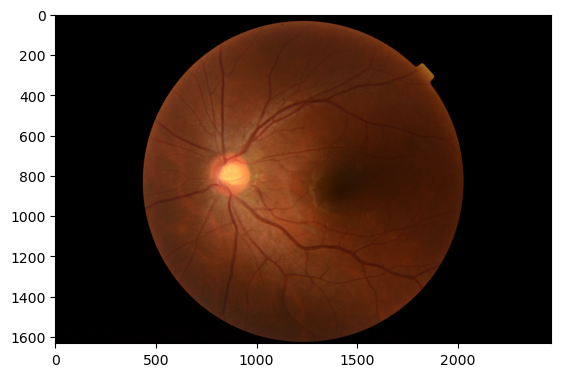

In [9]:
print("Sample normal image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_CATS_DIR, os.listdir(TRAINING_CATS_DIR)[0])}"))
plt.show()

print("\nSample cataract image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_NORMAL_DIR, os.listdir(TRAINING_NORMAL_DIR)[0])}"))
plt.show()

In [10]:
#data argumentation on train data and rescale the test data
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(160, 160))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(160, 160))
  ### END CODE HERE
  return train_generator, validation_generator

In [12]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR=TRAINING_DIR, VALIDATION_DIR=VALIDATION_DIR)

Found 340 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


here, we use transfer learning technique to get better results.

ResNet-50 is a convolutional neural network (CNN) architecture that is part of the ResNet (Residual Network) family. ResNet-50 is specifically known for its depth, containing 50 layers of neural network weights. 


In [16]:
from tensorflow.keras.applications import ResNet50

In [26]:
# Load the ResNet-50 base model without top classification layers
base_model = ResNet50(include_top=False, weights=None, input_shape=(160, 160, 3))

# Flatten the output layer to 1 dimension
x = keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.15
x = tf.keras.layers.Dropout(0.15)(x)

# Add another fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation="relu")(x)

# Add another dropout layer
x = tf.keras.layers.Dropout(0.15)(x)

# Add a final sigmoid layer for binary classification
x = Dense(1, activation='sigmoid')(x)

# Create the complete model by using the Model class
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
# Define a Callback class that stops training once accuracy reaches 99.9%
# it helps to neglect over fitting on training set
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.989):
      print("\nReached 98.9% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [28]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 10,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/10
22/22 [==============================] - 98s 4s/step - loss: 5.9418 - accuracy: 0.6265 - val_loss: 0.5645 - val_accuracy: 0.7500
Epoch 2/10
22/22 [==============================] - 79s 4s/step - loss: 2.0571 - accuracy: 0.6353 - val_loss: 0.7387 - val_accuracy: 0.2500
Epoch 3/10
22/22 [==============================] - 74s 3s/step - loss: 1.5645 - accuracy: 0.6206 - val_loss: 0.5895 - val_accuracy: 0.7500
Epoch 4/10
22/22 [==============================] - 73s 3s/step - loss: 1.2354 - accuracy: 0.6853 - val_loss: 0.6237 - val_accuracy: 0.7500
Epoch 5/10
22/22 [==============================] - 74s 3s/step - loss: 1.0548 - accuracy: 0.6559 - val_loss: 0.5849 - val_accuracy: 0.7500
Epoch 6/10
22/22 [==============================] - 74s 3s/step - loss: 0.9566 - accuracy: 0.6676 - val_loss: 0.5628 - val_accuracy: 0.7500
Epoch 7/10
22/22 [==============================] - 78s 4s/step - loss: 0.9041 - accuracy: 0.6853 - val_loss: 0.6609 - val_accuracy: 0.7500
Epoch 8/10
22/22 [==

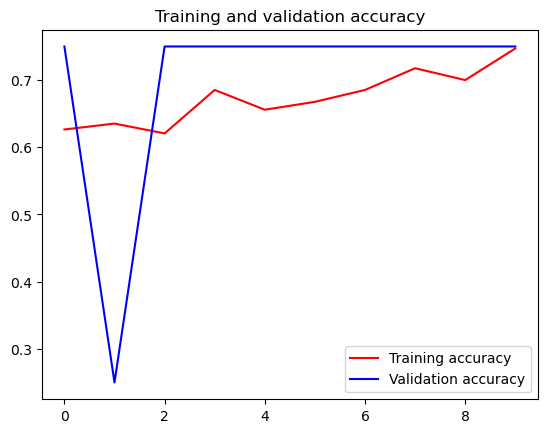

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

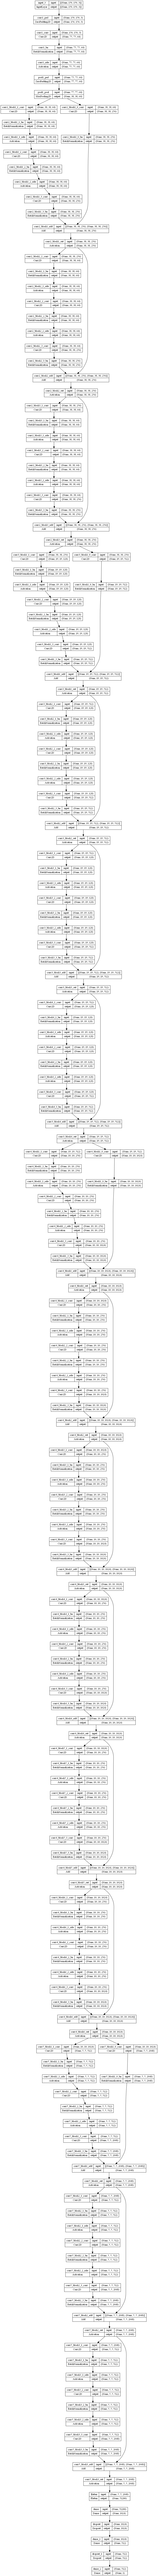

In [31]:
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

In [32]:
model.save("Eyes.h5")

c:\Users\w10\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
